**PRB utilization ile throughput tahmini alternatif yaklaşım**

1 - Klasik Çözümü :logaritma ile linearleştirme: 
Sabitsiz: y = a.b^x  
logy = loga + xlogb =} y = ax+b

Sabitli: y = a.b^x + c   
logy = log(a.b^x+c)

Görüldüğü üzere çözdüğümüz denkleme sabit eklemeye çalışırsak logaritma ayrıştırılamıyor ve lineer regresyon uygulanamıyor.

2 - Alternatif Çözüm :exponensiyel fonskiyona sabit ekleyip lossu minimize etmek:
y = a.b^x + c

Bize Getirileri: Eğri oturtmada daha esnek olmamızı sağlıyor ve PRBu-throughput ilişkisini daha iyi temsil ediyor.

Diyelim ki c değeri olmadığında MSE daha iyi sonuç versin, bu sefer powell ile c 0'a yakın bir değer bulunacaktır.
Yani kaybımız olmayacak.

MSE optimizasyonu için powell metodunu kullandım, gradyan azalma da kullanılabilirdi -büyük ihtimal daha uzun sürecektir-.

Tüm MSE'ler için 1. ve 2. kısmi türevleri kontrol ettim, X pozitif olduğu sürece tek lokal minumuma sahip oluyor ki projede gördüğüm kadarıyla PRB utilization yüzdelik(0-100 arası) değer alıyor. Yani koşul sağlanıyor.


**3 - SONUÇ**: 
**1.yöntemde MSE=3511  2.yöntemde MSE=2581**
Hız karşılaştırılması: Veri seti büyümesine powell metodu daha duyarlıdır, çok çok fazla input olmadığı sürece çalışma süresi yarım saniyenin altındadır. Durdurma koşulları ile hız optimize edilebilir.

Gürültülü veri yaratılması

100


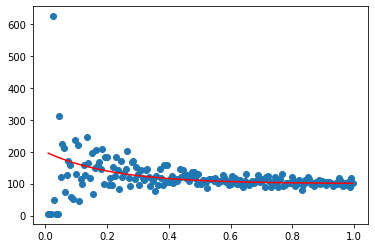

MSE for equation without noise:2773.1557008268305


In [4]:
import matplotlib.pyplot as plt
import numpy as np
e = 100 #base
print(e)
x = np.arange(0.01,1,0.005)
k=100
c=100
y = k*e**(-x) +c+ np.random.normal(0,3**1/(0.4*x),x.shape)
y[y<=0]=5
plt.scatter(x,y)
plt.plot(x,k*e**(-x) +c,color='red')
plt.show()

def error1(predicted,real):
    a=((real-predicted)**2).sum()/len(real)
    print(a)

print('MSE for equation without noise:',end='')
error1(k*e**(-x) +c,y)

Exec time(seconds): 0.0028100013732910156
MSE for 1st way:3511.3507194023614


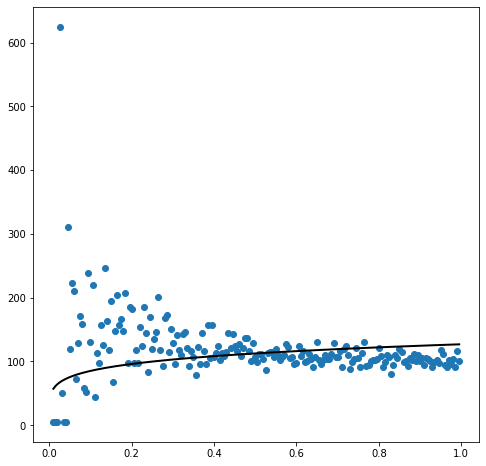

In [5]:
import time
from sklearn.linear_model import LinearRegression

start=time.time()
X = np.log(x).reshape(-1, 1)
Y = np.log(y).reshape(-1, 1)
reg = LinearRegression().fit(X, Y)

predictions=reg.predict(X)

end=time.time()
print("Exec time(seconds):",end-start)
print('MSE for 1st way:',end='')
def error1(predicted,real):
    return ((real-predicted)**2).sum()/len(real)
print(error1(np.squeeze(np.exp(predictions.reshape(1,-1))),y))

plt.figure(figsize=(8,8))
plt.scatter(x,y)
plt.plot(x,np.squeeze(np.exp(predictions.reshape(1,-1))),color='k',linewidth=2)
plt.show()

   direc: array([[-6.57158975e+00, -4.19901337e-01, -6.81156556e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-3.55921066e-01, -3.71479144e-03, -4.53604107e-02]])
     fun: 2580.680651276278
 message: 'Optimization terminated successfully.'
    nfev: 177
     nit: 5
  status: 0
 success: True
       x: array([163.7393261 ,   1.44524385, -17.75452086])
Exec time(seconds): 0.03319191932678223
MSE for 2nd way:2580.680651276278


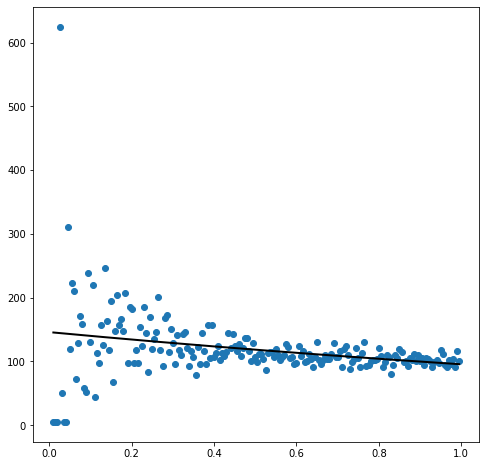

In [6]:

start=time.time()


def cost_exp(list):
    #y and x are already defined
    mse = ((list[2]+list[0]*(list[1])**-x-y)**2).sum()/len(y)
    #print each iteration
    #print('mse value: {:0.4f} prodConst: {:.4f} baseConst: {:.4f} const: {:.4f}'.format(mse,list[0],list[1],list[2]))  
    return mse

  
from scipy.optimize import minimize
pkonst=minimize(cost_exp,x0=np.array([1,np.exp(1),0]),
                #options={"maxiter":50,"maxfev":100}
                #durdurma koşulları güncellenebilir
                method='Powell')
print(pkonst)

end=time.time()

print("Exec time(seconds):",end-start)


def mse(predicted,real):
    return ((real-predicted)**2).sum()/len(real)

print('MSE for 2nd way:',end='')
print(mse((pkonst.x[2])+pkonst.x[0]*(pkonst.x[1])**-x,y))

plt.figure(figsize=(8,8))
plt.scatter(x,y)
plt.plot(x,(pkonst.x[2])+pkonst.x[0]*(pkonst.x[1])**-x,color='k',linewidth=2)
plt.show()

Powell ve Brent metodları hakkında kısa bilgi:

The Golden-Search method minimizes a one-dimensional function on the initially defined
interval [a, b]. The problem with Golden-Search is it’s slow convergence. Therefore the function f is
called quite often. For well-behaved functions a more sophisticated algorithm is based
on Brent’s method. It relies on parabolic approximations of the actual function f . Findingthe minimum of a parabola is 
quite easy.There also is a multidimensional extension of Brent’s method called Powell’s algorithm.

Unfortunately, there is no guarantee that a minimization method will find the global minimum of a function.
(--Bunu kontrol ettim kısmı türevlerle--)


https://docs.scipy.org/doc/scipy/reference/optimize.minimize-powell.html#optimize-minimize-powell
https://en.wikipedia.org/wiki/Powell%27s_method
https://www.youtube.com/watch?v=1Z_4sBNoZj4 Powell'in görsel anlatımı

https://en.wikipedia.org/wiki/Brent%27s_method